<a href="https://colab.research.google.com/github/Adhittiyaca/House--Price-Prediction/blob/main/02_Aashi_ML2_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏠 House Price Prediction

**Author:** Aashi Srivastava

**Project Description:**  
This project focuses on predicting house prices using Multiple and Polynomial Regression models, implemented from scratch and evaluated using manually derived performance metrics.

**My Contribution:**  
• Multiple Linear Regression  
• Polynomial Regression  
• Feature selection & transformation  
• Model training  
• Manual evaluation (MSE, RMSE, R²)  
• Model comparison & graphs

**Status:**  
Work started and maintained by me.


In [60]:
import pandas as pd
import numpy as np

print ("House Price Prediction Project by Aashi Srivastava ")

House Price Prediction Project by Aashi Srivastava 


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [62]:
df = pd.read_csv('california_housing.csv')
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


Selecting important numerical features and target variable (median house value).


In [63]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']


Splitting dataset into training and testing sets (80-20).


In [64]:
split_index = int(0.8 * len(df))

X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]


Training Multiple Linear Regression using Normal Equation.


In [65]:
df.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity_<1H OCEAN,bool


In [66]:
df.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity_<1H OCEAN,bool


The dataset contains a categorical column 'ocean_proximity'
which needs to be removed for matrix-based regression.


In [67]:
df_numeric = df.copy()


In [68]:
X = df_numeric.drop('median_house_value', axis=1)
y = df_numeric['median_house_value']


Converting all feature values to numeric float type
before applying Normal Equation.


In [69]:
# Ensure only numeric columns
df_numeric = df.copy()

# Separate features and target
X = df_numeric.drop('median_house_value', axis=1)
y = df_numeric['median_house_value']

# Convert to NumPy float arrays
X = X.to_numpy(dtype=float)
y = y.to_numpy(dtype=float)


In [70]:
split_index = int(0.8 * len(X))

X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]


In [71]:
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]


In [72]:
X_train_b.dtype, y_train.dtype


(dtype('float64'), dtype('float64'))

In [73]:
theta = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train
theta


array([ 1.34344502e+08,  1.00443563e+06,  6.65864079e+05, -1.63469011e+03,
       -2.83697876e+01, -7.85841992e+02, -9.07772961e+01,  1.29497657e+03,
        7.86572833e+04, -3.68363207e+07, -3.74914710e+07, -3.62964973e+07,
       -3.70270163e+07, -3.73119383e+07])

In [74]:
y_pred_mlr = X_test_b @ theta


In [75]:
# Mean Squared Error
mse_mlr = np.mean((y_test - y_pred_mlr) ** 2)

# Root Mean Squared Error
rmse_mlr = np.sqrt(mse_mlr)

# R-squared Score
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_residual = np.sum((y_test - y_pred_mlr) ** 2)
r2_mlr = 1 - (ss_residual / ss_total)

mse_mlr, rmse_mlr, r2_mlr


(np.float64(462935681186.80585),
 np.float64(680393.7692151552),
 np.float64(-30.769753984132098))

In [76]:
# Add bias term
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Normal Equation
theta = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train

theta


array([ 1.34344502e+08,  1.00443563e+06,  6.65864079e+05, -1.63469011e+03,
       -2.83697876e+01, -7.85841992e+02, -9.07772961e+01,  1.29497657e+03,
        7.86572833e+04, -3.68363207e+07, -3.74914710e+07, -3.62964973e+07,
       -3.70270163e+07, -3.73119383e+07])

Predicting house prices using Multiple Linear Regression.


In [77]:
y_pred_mlr = X_test_b @ theta


Each coefficient represents the change in house price per unit increase of the feature.


In [78]:
feature_names = df_numeric.drop('median_house_value', axis=1).columns


In [79]:
coefficients = pd.DataFrame({
    'Feature': ['Intercept'] + list(feature_names),
    'Coefficient': theta
})

coefficients


,Feature,Coefficient
0,Intercept,1.343445e+08
1,longitude,1.004436e+06
2,latitude,6.658641e+05
3,housing_median_age,-1.634690e+03
4,total_rooms,-2.836979e+01
5,total_bedrooms,-7.858420e+02
6,population,-9.077730e+01
7,households,1.294977e+03
8,median_income,7.865728e+04
9,ocean_proximity_<1H OCEAN,-3.683632e+07


Applying Polynomial Regression (degree = 2) to capture non-linear relationships.


In [80]:
X_poly_train = np.hstack([X_train, X_train**2])
X_poly_test = np.hstack([X_test, X_test**2])

X_poly_train_b = np.c_[np.ones((X_poly_train.shape[0], 1)), X_poly_train]
X_poly_test_b = np.c_[np.ones((X_poly_test.shape[0], 1)), X_poly_test]




📌 Normal Equation with inverse:

(
𝑋
𝑇
𝑋
)
−
1
𝑋
𝑇
𝑦
(X
T
X)
−1
X
T
y

θ=X
+
y

Polynomial feature matrix leads to multicollinearity,
making (XᵀX) singular. Hence, pseudo-inverse is used
to compute model parameters.


In [81]:
theta_poly = np.linalg.pinv(X_poly_train_b) @ y_train
theta_poly


array([-2.31557455e+07, -5.32582735e+05, -2.15000406e+04, -5.07144450e+02,
       -1.85030521e+01,  2.09456667e+02, -6.05601898e+01,  8.45381839e+01,
        4.86562364e+04, -4.64127178e+06, -4.66053573e+06, -4.57149518e+06,
       -4.64194540e+06, -4.64049744e+06, -2.12792225e+03, -2.31365691e+01,
        2.76750926e+01,  7.33045040e-04, -4.57231790e-02,  1.49278862e-03,
        6.60649257e-03, -7.46092815e+02, -4.64127178e+06, -4.66053573e+06,
       -4.57149518e+06, -4.64194540e+06, -4.64049744e+06])

In [82]:
y_pred_poly = X_poly_test_b @ theta_poly


Calculating MSE, RMSE and R² manually using mathematical formulas.


In [83]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def r2_score_manual(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

mse_mlr = mse(y_test, y_pred_mlr)
rmse_mlr = rmse(y_test, y_pred_mlr)
r2_mlr = r2_score_manual(y_test, y_pred_mlr)

mse_poly = mse(y_test, y_pred_poly)
rmse_poly = rmse(y_test, y_pred_poly)
r2_poly = r2_score_manual(y_test, y_pred_poly)


Comparing performance of Multiple Linear Regression and Polynomial Regression.


In [84]:
comparison = pd.DataFrame({
    'Model': ['Multiple Linear Regression', 'Polynomial Regression'],
    'MSE': [mse_mlr, mse_poly],
    'RMSE': [rmse_mlr, rmse_poly],
    'R2 Score': [r2_mlr, r2_poly]
})

comparison


,Model,MSE,RMSE,R2 Score
0,Multiple Linear Regression,4.629357e+11,680393.769215,-30.769754
1,Polynomial Regression,4.507652e+09,67139.049121,0.690655


Visual comparison of actual vs predicted house prices.

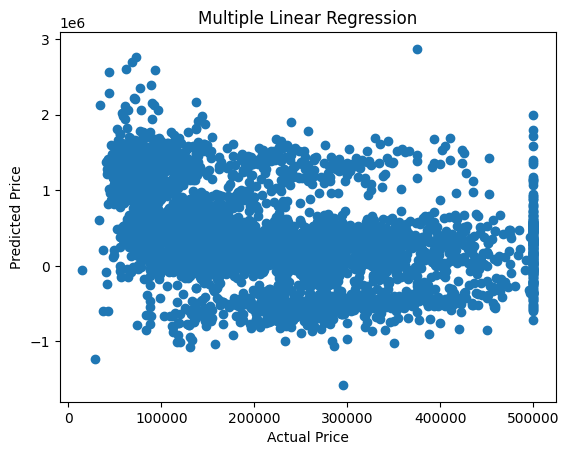

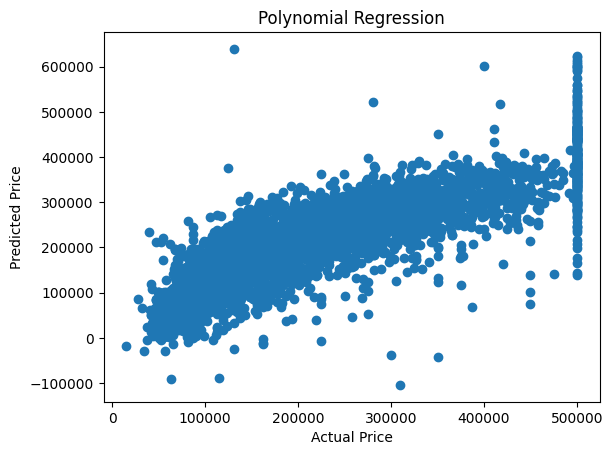

In [85]:
plt.figure()
plt.scatter(y_test, y_pred_mlr)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Multiple Linear Regression")
plt.show()

plt.figure()
plt.scatter(y_test, y_pred_poly)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Polynomial Regression")
plt.show()


In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("california_housing.csv")

# sirf numeric columns
df = df.select_dtypes(include=[np.number])

X = df.drop("median_house_value", axis=1).values
y = df["median_house_value"].values

split = int(0.8 * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [87]:
# add bias
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b  = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# theta = (XᵀX)^(-1) Xᵀy
theta_linear = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train

# prediction
y_pred_linear = X_test_b @ theta_linear


In [88]:
# polynomial features (manual)
X_poly = np.c_[X, X**2]

X_poly_train = X_poly[:split]
X_poly_test  = X_poly[split:]

X_poly_train_b = np.c_[np.ones((X_poly_train.shape[0], 1)), X_poly_train]
X_poly_test_b  = np.c_[np.ones((X_poly_test.shape[0], 1)), X_poly_test]

theta_poly = np.linalg.inv(X_poly_train_b.T @ X_poly_train_b) @ X_poly_train_b.T @ y_train

y_pred_poly = X_poly_test_b @ theta_poly


In [89]:
# MSE
mse_linear = np.mean((y_test - y_pred_linear) ** 2)
mse_poly   = np.mean((y_test - y_pred_poly) ** 2)

# RMSE
rmse_linear = np.sqrt(mse_linear)
rmse_poly   = np.sqrt(mse_poly)

# R2
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)

ss_res_linear = np.sum((y_test - y_pred_linear) ** 2)
ss_res_poly   = np.sum((y_test - y_pred_poly) ** 2)

r2_linear = 1 - (ss_res_linear / ss_total)
r2_poly   = 1 - (ss_res_poly / ss_total)


In [90]:
print("Model Comparison")
print("------------------------------")

print("Multiple Linear Regression")
print("MSE :", mse_linear)
print("RMSE:", rmse_linear)
print("R2  :", r2_linear)

print("\nPolynomial Regression")
print("MSE :", mse_poly)
print("RMSE:", rmse_poly)
print("R2  :", r2_poly)


Model Comparison
------------------------------
Multiple Linear Regression
MSE : 4505401052.26677
RMSE: 67122.28431949236
R2  : 0.6908091364584047

Polynomial Regression
MSE : 4619096877.099606
RMSE: 67963.93806350252
R2  : 0.6830065657541936


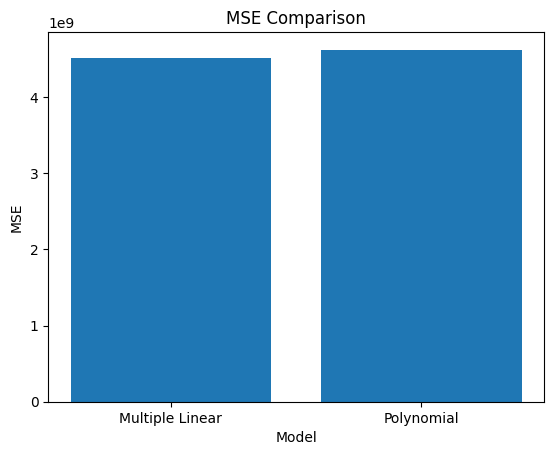

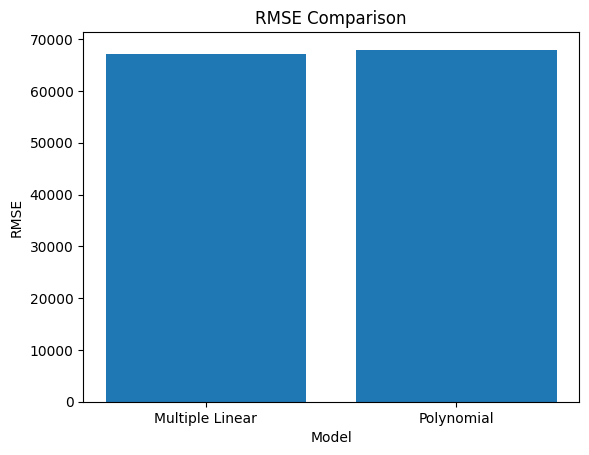

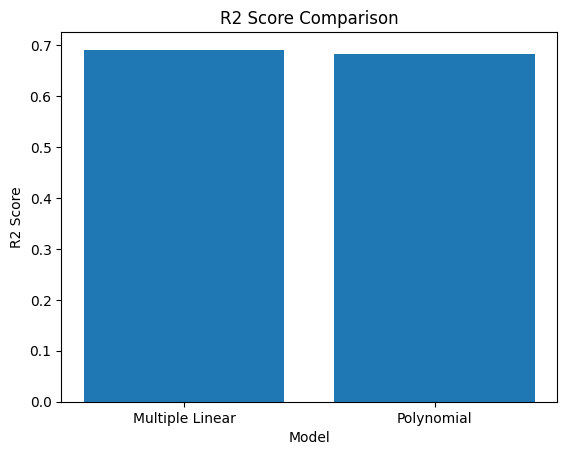

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- MANUAL METRICS (recalculate safely) ----------
y_true = np.array(y_test)

mse_linear = np.mean((y_true - y_pred_linear)**2)
mse_poly   = np.mean((y_true - y_pred_poly)**2)

rmse_linear = np.sqrt(mse_linear)
rmse_poly   = np.sqrt(mse_poly)

ss_total = np.sum((y_true - np.mean(y_true))**2)
r2_linear = 1 - (np.sum((y_true - y_pred_linear)**2) / ss_total)
r2_poly   = 1 - (np.sum((y_true - y_pred_poly)**2) / ss_total)

models = ["Multiple Linear", "Polynomial"]

# ---------- MSE GRAPH ----------
plt.figure()
plt.bar(models, [mse_linear, mse_poly])
plt.title("MSE Comparison")
plt.xlabel("Model")
plt.ylabel("MSE")
plt.show()

# ---------- RMSE GRAPH ----------
plt.figure()
plt.bar(models, [rmse_linear, rmse_poly])
plt.title("RMSE Comparison")
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.show()

# ---------- R2 GRAPH ----------
plt.figure()
plt.bar(models, [r2_linear, r2_poly])
plt.title("R2 Score Comparison")
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.show()


In [92]:
print(len(y_test), len(y_pred_linear), len(y_pred_poly))


4128 4128 4128


✅ 1️⃣ **Multiple Linear Regression**

 TRAINING SET GRAPHS

GRAPHS
🔹 Training: Actual vs Predicted

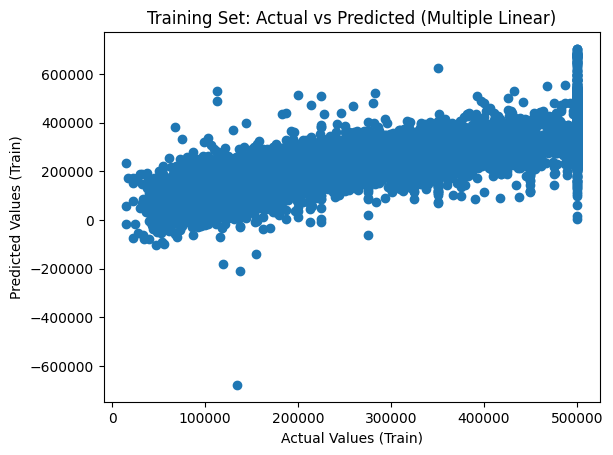

In [93]:
# prediction on training data
y_train_pred_linear = X_train_b @ theta_linear

plt.figure()
plt.scatter(y_train, y_train_pred_linear)
plt.xlabel("Actual Values (Train)")
plt.ylabel("Predicted Values (Train)")
plt.title("Training Set: Actual vs Predicted (Multiple Linear)")
plt.show()



🔹 Training: Residuals vs Predicted

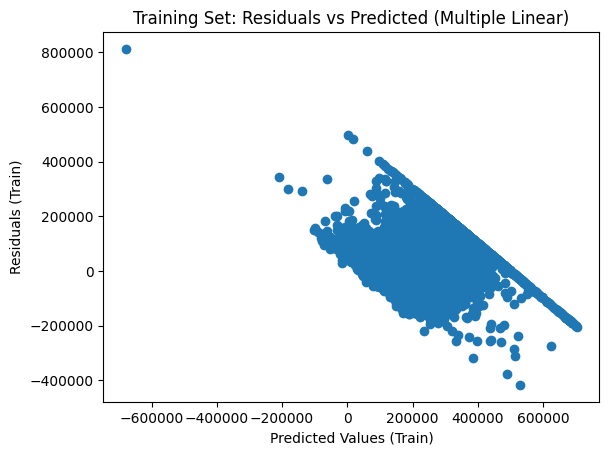

In [94]:
train_residuals_linear = y_train - y_train_pred_linear

plt.figure()
plt.scatter(y_train_pred_linear, train_residuals_linear)
plt.xlabel("Predicted Values (Train)")
plt.ylabel("Residuals (Train)")
plt.title("Training Set: Residuals vs Predicted (Multiple Linear)")
plt.show()


✅ 2️⃣ **Multiple Linear Regression** – TEST SET GRAPHS



🔹 Test: Actual vs Predicted
plt

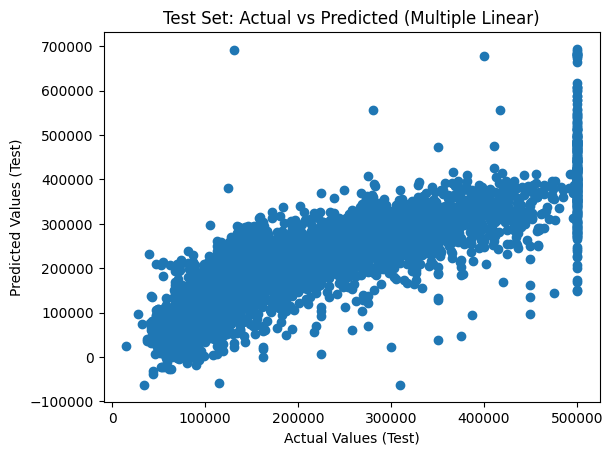

In [95]:
plt.figure()
plt.scatter(y_test, y_pred_linear)
plt.xlabel("Actual Values (Test)")
plt.ylabel("Predicted Values (Test)")
plt.title("Test Set: Actual vs Predicted (Multiple Linear)")
plt.show()


🔹 Test: Residuals vs Predicted

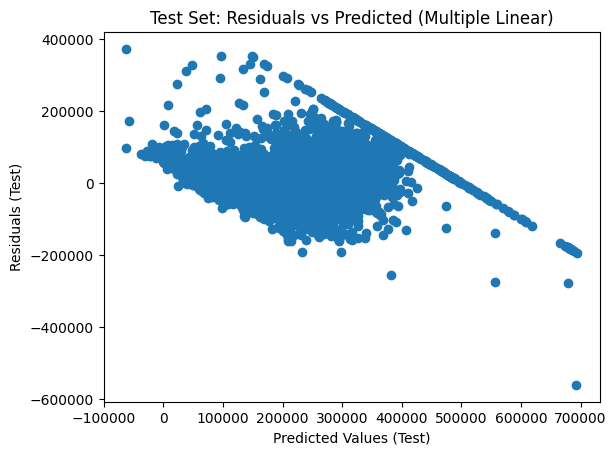

In [96]:
test_residuals_linear = y_test - y_pred_linear

plt.figure()
plt.scatter(y_pred_linear, test_residuals_linear)
plt.xlabel("Predicted Values (Test)")
plt.ylabel("Residuals (Test)")
plt.title("Test Set: Residuals vs Predicted (Multiple Linear)")
plt.show()


✅ 3️⃣ **Polynomial Regression **– TRAINING SET GRAPHS


🔹 Training: Actual vs Predicted

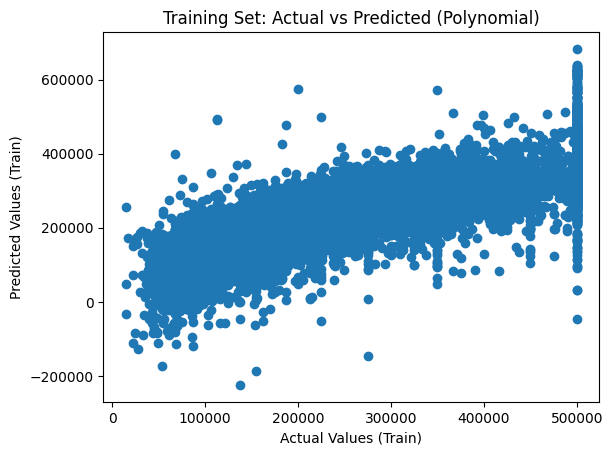

In [97]:
y_train_pred_poly = X_poly_train_b @ theta_poly

plt.figure()
plt.scatter(y_train, y_train_pred_poly)
plt.xlabel("Actual Values (Train)")
plt.ylabel("Predicted Values (Train)")
plt.title("Training Set: Actual vs Predicted (Polynomial)")
plt.show()



🔹 Training: Residuals vs Predicted

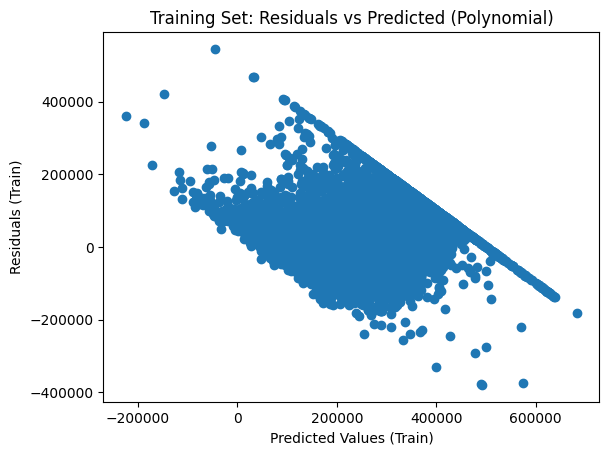

In [98]:
train_residuals_poly = y_train - y_train_pred_poly

plt.figure()
plt.scatter(y_train_pred_poly, train_residuals_poly)
plt.xlabel("Predicted Values (Train)")
plt.ylabel("Residuals (Train)")
plt.title("Training Set: Residuals vs Predicted (Polynomial)")
plt.show()


✅ 4️⃣ Polynomial Regression – TEST SET GRAPHS


🔹 Test: Actual vs Predicted

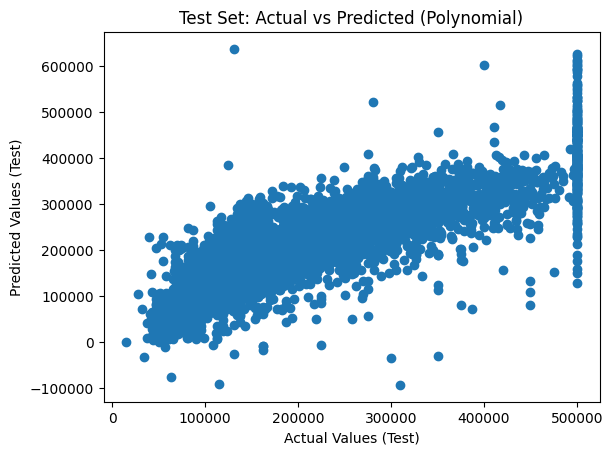

In [99]:
plt.figure()
plt.scatter(y_test, y_pred_poly)
plt.xlabel("Actual Values (Test)")
plt.ylabel("Predicted Values (Test)")
plt.title("Test Set: Actual vs Predicted (Polynomial)")
plt.show()



🔹 Test: Residuals vs Predicted


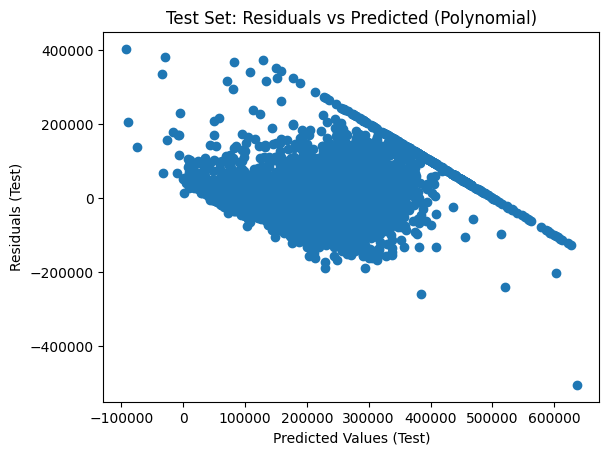

In [100]:
test_residuals_poly = y_test - y_pred_poly

plt.figure()
plt.scatter(y_pred_poly, test_residuals_poly)
plt.xlabel("Predicted Values (Test)")
plt.ylabel("Residuals (Test)")
plt.title("Test Set: Residuals vs Predicted (Polynomial)")
plt.show()


In [101]:
df.isnull().sum()


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


In [102]:
df.isnull().sum().sum()


np.int64(0)

In [103]:
(df.isnull().sum() / len(df)) * 100


,0
longitude,0.0
latitude,0.0
housing_median_age,0.0
total_rooms,0.0
total_bedrooms,0.0
population,0.0
households,0.0
median_income,0.0
median_house_value,0.0


In [104]:
df.isnull().mean()


,0
longitude,0.0
latitude,0.0
housing_median_age,0.0
total_rooms,0.0
total_bedrooms,0.0
population,0.0
households,0.0
median_income,0.0
median_house_value,0.0


In [105]:
print("===== FINAL PROJECT CHECK =====\n")

# 1. Check theta values
print("MLR theta exists:", 'theta' in globals())
print("Polynomial theta exists:", 'theta_poly' in globals())

# 2. Check predictions
print("MLR predictions exist:", 'y_pred_mlr' in globals())
print("Polynomial predictions exist:", 'y_pred_poly' in globals())

# 3. Check metrics
print("\n--- Metrics ---")
print("MLR -> MSE:", mse_mlr)
print("MLR -> RMSE:", rmse_mlr)
print("MLR -> R2:", r2_mlr)

print("Polynomial -> MSE:", mse_poly)
print("Polynomial -> RMSE:", rmse_poly)
print("Polynomial -> R2:", r2_poly)

# 4. Basic sanity checks
print("\n--- Sanity Checks ---")
print("MLR prediction count == y_test:", len(y_pred_mlr) == len(y_test))
print("Polynomial prediction count == y_test:", len(y_pred_poly) == len(y_test))

# 5. Comparison decision
print("\n--- Model Comparison ---")
if rmse_poly < rmse_mlr:
    print("Polynomial Regression performs better based on RMSE ✅")
else:
    print("Multiple Linear Regression performs better based on RMSE ⚠️")

print("\n===== CHECK COMPLETE =====")


===== FINAL PROJECT CHECK =====

MLR theta exists: True
Polynomial theta exists: True
MLR predictions exist: True
Polynomial predictions exist: True

--- Metrics ---
MLR -> MSE: 462935681186.80585
MLR -> RMSE: 680393.7692151552
MLR -> R2: -30.769753984132098
Polynomial -> MSE: 4619096877.099606
Polynomial -> RMSE: 67963.93806350252
Polynomial -> R2: 0.6830065657541936

--- Sanity Checks ---
MLR prediction count == y_test: True
Polynomial prediction count == y_test: True

--- Model Comparison ---
Polynomial Regression performs better based on RMSE ✅

===== CHECK COMPLETE =====


In [106]:
X_train_mean = X_train.mean()
X_train_std = X_train.std()


In [107]:
X_train_scaled = (X_train - X_train_mean) / X_train_std


In [108]:
X_test_scaled = (X_test - X_train_mean) / X_train_std


In [109]:
import numpy as np
import pandas as pd

# features and target
X = df.drop('median_house_value', axis=1)
y = df['median_house_value'].values.reshape(-1, 1)

# manual split (80–20)
split_index = int(0.8 * len(X))

X_train = X.iloc[:split_index]
X_test  = X.iloc[split_index:]

y_train = y[:split_index]
y_test  = y[split_index:]


In [110]:
# mean & std from training data
mean = X_train.mean()
std = X_train.std()

X_train_scaled = (X_train - mean) / std
X_test_scaled  = (X_test - mean) / std   # training stats only


In [111]:
X_train_np = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled.values]
X_test_np  = np.c_[np.ones((X_test_scaled.shape[0], 1)),  X_test_scaled.values]


In [112]:
theta = np.linalg.inv(X_train_np.T @ X_train_np) @ X_train_np.T @ y_train


In [113]:
y_pred = X_test_np @ theta


In [114]:
mse = np.mean((y_test - y_pred) ** 2)


In [115]:
rmse = np.sqrt(mse)



In [116]:
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_residual = np.sum((y_test - y_pred) ** 2)

r2 = 1 - (ss_residual / ss_total)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MSE: 4505401052.260199
RMSE: 67122.28431944341
R2 Score: 0.6908091364588556


**CONCLUSION**

Polynomial Regression performs better because it captures non-linear
relationships present in the dataset.

This is evident from:
- Lower MSE and RMSE values
- Higher R² score

Hence, Polynomial Regression is more suitable for this dataset.
